# Hyperparameter Optimization

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(
    np.c_[data['data'], data['target']],
    columns= np.append(data['feature_names'], ['target'])
)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [4]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [5]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [6]:
data = df[features_mean + ['target']]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


In [7]:
X = data.drop(['target'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
knn = KNeighborsClassifier()

In [ ]:
KNeighborsClassifier?

There are three possible options for performing hyperparameter optimization:
* Manual.
* Grid Search.
* Random Search.
    
The manual search can be very tedious and inefficient, so we are going to try the other two: **random** and by **grid**. In addition, we already have an idea of the performance of these models on this dataset from the previous encounter.

### 1.1 Grid Search

In [9]:
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 3, 5, 7, 10],
    'algorithm': ['auto', 'kd_tree']
}

In [10]:
# STRATEGY 1: Grid Search + CV
model_grid = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

**But how do I choose the best configuration? What is the best performance? And the rest of the results?**

**Hint:** The correct answer is always found in the documentation.

There are 3 attributes of the model (class from the sklearn library) that will help us answer these questions: `best_params_`, `best_score_` and `cv_results_`

**To investigate:** Before you continue running notebbok, read a bit more about the documentation in general for [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and in particular about the 3 attributes that we just mentioned.

In [11]:
print("Best params: "+str(model_grid.best_params_))
print("Best Score: "+str(model_grid.best_score_)+'\n')

scores = pd.DataFrame(model_grid.cv_results_)
scores

Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8857142857142858



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005141,0.000621,0.007902,0.000494,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
1,0.004426,0.000199,0.004661,0.000483,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
2,0.004610,0.000116,0.010664,0.001193,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.857143,0.824176,0.835165,0.879121,0.813187,0.841758,0.023671,371
3,0.005141,0.000905,0.005153,0.000822,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,341
4,0.004786,0.000236,0.010705,0.001944,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.890110,0.846154,0.934066,0.824176,0.868132,0.872527,0.037812,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.003523,0.000050,0.004232,0.000078,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.890110,0.879121,0.923077,0.846154,0.868132,0.881319,0.025441,101
376,0.003567,0.000057,0.007809,0.000107,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,121
377,0.003434,0.000053,0.004159,0.000063,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.879121,0.923077,0.846154,0.868132,0.883516,0.026556,21
378,0.003533,0.000104,0.007964,0.000087,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,121


In this DataFrame are all the results returned by `GridSearchCV()`. There is a lot of information to explore, but run through the following cells before doing so.

We already read the documentation and therefore we already know that we can predict with the best model as follows:

In [12]:
prediction = model_grid.predict(X_test)

Confusion Matrix:


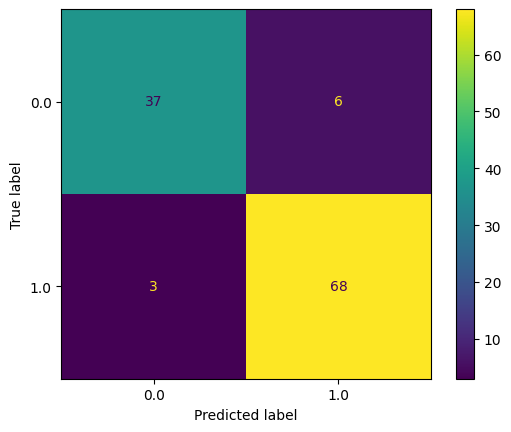

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test)
print("Confusion Matrix:")

In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        43
         1.0       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



### 1.2 Random Search

The methodology is very similar. The main difference is that, to create the grid, we no longer have to pass values for the hyperparameters, but a random generator for each attribute, in those attributes that we want it to explore randomly.

In [15]:
param_dist = {
    'n_neighbors': sp.stats.randint(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': sp.stats.randint(1, 10),
    'algorithm': ['auto', 'kd_tree']
}

In [ ]:
help(sp.stats.randint)

In [16]:
# STRATEGY 2: Random Search + CV
model_random = RandomizedSearchCV(knn, param_dist, n_iter=100, random_state=0, cv=5, n_jobs=-1)
model_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f40e96faa40>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f40e9548fa0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [17]:
print("Best params: "+str(model_random.best_params_))
print("Best Score: "+str(model_random.best_score_)+'\n')

scores = pd.DataFrame(model_random.cv_results_)
scores

Best params: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 16, 'weights': 'distance'}
Best Score: 0.8857142857142858



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004179,0.000410,0.005640,0.003121,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.868132,0.835165,0.868132,0.835165,0.824176,0.846154,0.018388,88
1,0.004430,0.001162,0.006679,0.003836,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.890110,0.879121,0.923077,0.846154,0.879121,0.883516,0.024670,8
2,0.004673,0.001147,0.009730,0.000925,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.901099,0.868132,0.934066,0.835165,0.857143,0.879121,0.034750,35
3,0.004237,0.000118,0.011108,0.001193,kd_tree,7,13,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.868132,0.934066,0.835165,0.857143,0.876923,0.033620,56
4,0.003999,0.000191,0.004207,0.000095,kd_tree,7,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.879121,0.923077,0.846154,0.879121,0.883516,0.024670,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003474,0.000046,0.004407,0.000451,auto,6,12,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.901099,0.868132,0.923077,0.846154,0.879121,0.883516,0.026556,8
96,0.003821,0.000384,0.004414,0.000062,auto,3,14,distance,"{'algorithm': 'auto', 'leaf_size': 3, 'n_neigh...",0.901099,0.879121,0.923077,0.846154,0.868132,0.883516,0.026556,8
97,0.003842,0.000290,0.004760,0.000423,kd_tree,7,11,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.890110,0.868132,0.923077,0.846154,0.868132,0.879121,0.026005,35
98,0.004543,0.000546,0.008658,0.000352,auto,1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.857143,0.846154,0.912088,0.780220,0.846154,0.848352,0.041931,84


In [18]:
prediction = model_random.predict(X_test)

Confusion Matrix:


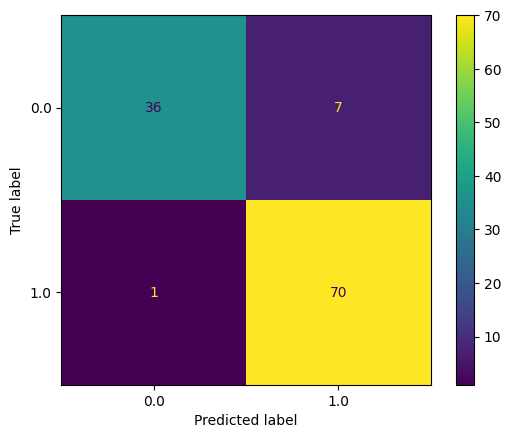

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_random, X_test, y_test)
print("Confusion Matrix:")

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        43
         1.0       0.91      0.99      0.95        71

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



---
# Validation Curves

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
sns.set_theme()

scores_train = []
scores_test = []
depths = np.arange(1, 10)

for max_depth in depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

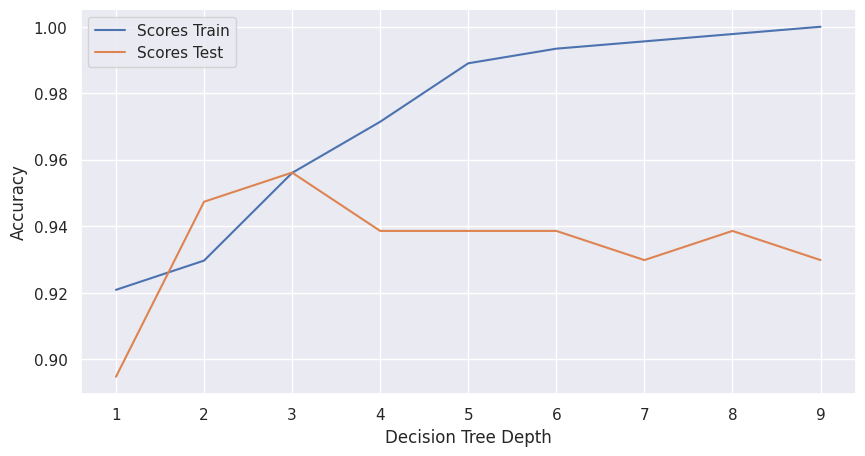

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(depths, scores_train, label='Scores Train')
plt.plot(depths, scores_test, label='Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Decision Tree Depth')
plt.show()

---
# Validation Curves + CV

In [23]:
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

depths = np.arange(1, 10, 1)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)

    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())

    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

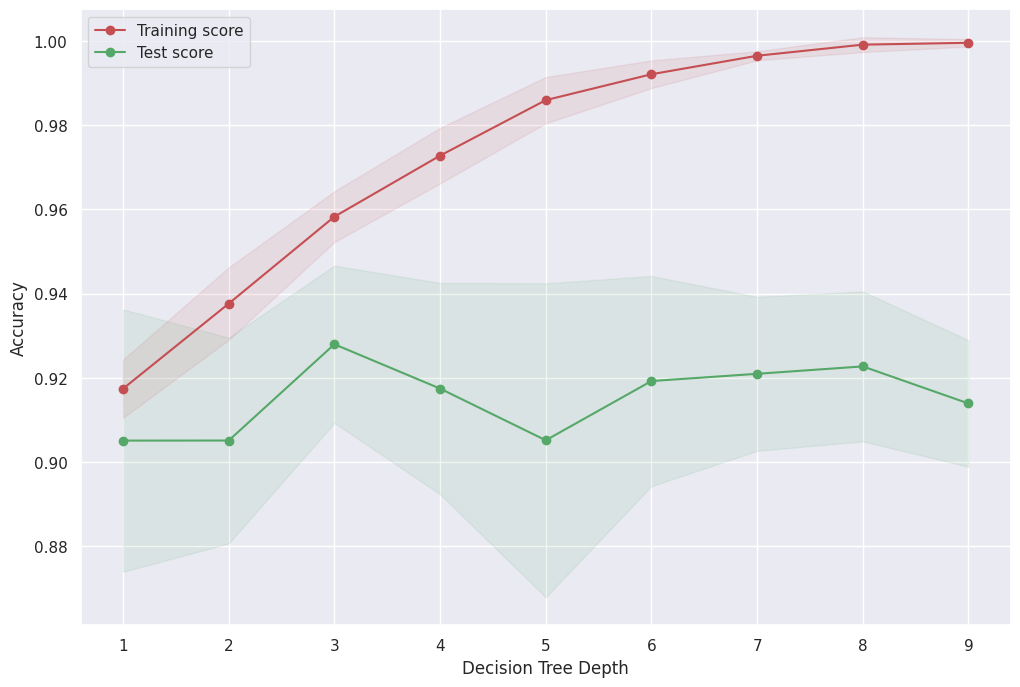

In [24]:
plt.figure(figsize=(12, 8))
plt.fill_between(
    depths,
    tree_train_scores_mean - tree_train_scores_std,
    tree_train_scores_mean + tree_train_scores_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    depths,
    tree_test_scores_mean - tree_test_scores_std,
    tree_test_scores_mean + tree_test_scores_std,
    alpha=0.1,
    color="g"
)
plt.plot(
    depths,
    tree_train_scores_mean,
    'o-', color="r",
    label="Training score"
)
plt.plot(
    depths,
    tree_test_scores_mean,
    'o-', color="g",
    label="Test score"
)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Decision Tree Depth')
plt.show()